# Introduction to Pandas

## By Albert S. Kyle
## Modified by Sam Galita

**Welcome to BUFN400's Python Bootcamp! This notebook illustrates how to read csv files into pandas, do basic data manipulations to get data into the form needed for further analysis, and do simple plots.**

We will read three datasets:

1. Historical data on inflation from the Bureau of Labor Statistics.

2. Zillow home price data.

3. Zillow home rent data.



In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import timeit
import math
import statistics
import nbconvert

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('NumPy version ' + np.__version__)
print('SciPy version ' + scipy.__version__)
print('matplotlib version ' + matplotlib.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)


Python version 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.4.2
NumPy version 1.21.5
SciPy version 1.7.3
matplotlib version 3.5.1
Timestamp: 2023-0821-2338


### Part 1: Historical data on inflation

Download into your computer the file *SeriesReport-20230815120215_336802.csv*, which contains a complete history of the monthly Consumer Price Index (CPI). You can examine this file using Excel and see that it is a rectangular spreadsheet with columns for years and rows for months.  There are also a dozen or so lines of header information, most of which we do not need.  


### Using pandas `pd.read_csv(...)`

If you do not want to look at the file in Excel or in a word processor first, you can read it into pandas as follows:

In [3]:
!echo %cd% ## fetch pwd 

C:\Users\samrg\Downloads ## fetch pwd


In [4]:
local_path = "C:/Users/samrg/Downloads/"

In [5]:
# Historical CPI spreadsheet downloaded from https://data.bls.gov/timeseries/CUUR0000SA0?years_option=all_years

#df1 = pd.read_csv("C:/Users/samrg/Downloads/SeriesReport-20230815120215_336802.csv")


df1 = pd.read_csv(local_path + "SeriesReport-20230815120215_336802.csv")

display(df1.head(15))


,CPI for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All items in U.S. city average, all urban cons...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Area:,U.S. city average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Item:,All items,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Base Period:,1982-84=100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Years:,1913 to 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that the names of the columns begin on line number 10, with the data after that.  There are also a few extra lines at the top of the file.

The function *pd.read_csv(...)* has many different options, providing great flexibility for reading many different kinds of CSV files.

After some guessing, we find that we can read the data into a nice pandas dataframe by ignoring the first 11 lines, using the `skiprows=11` option:

In [6]:
df = pd.read_csv(local_path + "SeriesReport-20230815120215_336802.csv", skiprows=11)

display(df.head(5))
display(df.tail(5))

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,NaN,NaN
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,NaN,NaN
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,NaN,NaN
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,NaN,NaN
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,NaN,NaN


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974,254.412,256.903
107,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474,257.557,260.065
108,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802,266.236,275.703
109,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,297.711,296.797,288.347,296.963
110,2023,299.170,300.840,301.836,303.363,304.127,305.109,305.691,NaN,NaN,NaN,NaN,NaN,302.408,NaN


We see that there are 111 years of data, from 1913 to 2023. A representative basket of consumer goods which cost USD 9.80 in January 1913 cost  USD 305.69 in July 2023.

We want to drop the columns 'HALF1' and 'HALF2', which summarze the CPI over 6-month periods, keeping only the monthly numbers.


In [7]:
df = df.drop(columns=['HALF1', 'HALF2'])
display(df.head(5))

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7


Instead of having a rectangle of years and months, we would like to have one column containing all dates.

We can change rows to columns using the `melt` function. (Note: The opposite change, columns to rows, uses the `pivot`, `pivot_table`, or `eplode` functions.)

In [8]:
df = df.melt(id_vars='Year', var_name='month', value_name='cpi')
#df = df.sort_values(['Year', 'month'], ascending=True)
display(df.dtypes)
display(df.head(5))
display(df.tail(10))


Year       int64
month     object
cpi      float64
dtype: object

,Year,month,cpi
0,1913,Jan,9.8
1,1914,Jan,10.0
2,1915,Jan,10.1
3,1916,Jan,10.4
4,1917,Jan,11.7


,Year,month,cpi
1322,2014,Dec,234.812
1323,2015,Dec,236.525
1324,2016,Dec,241.432
1325,2017,Dec,246.524
1326,2018,Dec,251.233
1327,2019,Dec,256.974
1328,2020,Dec,260.474
1329,2021,Dec,278.802
1330,2022,Dec,296.797
1331,2023,Dec,NaN


#### Date format

We would like to convert the two columns 'Year' and 'month' into one column representing the date in a convenient manner for time series analysis.

There are several ways of keeping track of dates in python:

1. Python has is own type *datetime.datetime*. It is good for working with one date at a time but was not designed for working with arrays of many dates.

2. Numpy has the type *np.datetime64*, which converts arrays of strings into dates but otherwise does not have a lot of functionality.

3. Pandas has the *Timestamp* scalar type, which is like *np.datetime64*.

An array of pandas datetimes is essentially a wrapper around an array of *np.datetime64*, which itself is a wrapper around *np.int64*. This means that conversion from pandas time series to *np.datetime64* arrays or arrays of *np.int64* is instantaneous because the underlying data is the same. 

Pandas offers a great deal of functionality for working with dates, including handling time zone information (which numpy has deprecated). 

In practice, I recommend working with pandas datetime, switching explicitlly to *np.datetime64* or *np.int64* only when there is a good reason to do so.

### Background on how to represent dates

Handling dates and time with high precsion is complicated for a variety of reasons:

1. Time is measured in years, months, weeks, days, hours, minutes, seconds, milliseconds, microseconds, and nanoseconds.

2. Leap years have an extra day. Not all months have the same number of days.

3. "Leap seconds" are frequently added at the end of a year (and in principle could be subtracted).

UNIX time (related to Posix time) is a standard which represents time as the number of seconds which have passed since a specific date called the **UNIX epoch**. This date is January 1, 1970, immediately when the clock strikes midnight on New Year's Eve. For simplicity, UNIX time makes the intentional "mistake" of pretending that leap seconds do not exist.  This ensures that all days have the same number of seconds ($24 * 60 * 60 = 86400$), but it introduces complexities for an operating system keeping track of time during the 86401th second of the last day of the year when leap seconds are added.

Numpy and pandas represent time as a signed integer which defines a date and time as the number of base time units which have passed since a base epoch, following the Posix convention of pretending that leap seconds do not exist. In principle, the base time unit can be any length of time.  In practice, numpy and pandas use nanoseconds as a default but allow the user to substitute milliseconds or or other base time units. In principle, the base epoch can also be arbitrary.  In practice, numpy and pandas follow the UNIX convention of using January 1, 1970. Negative integers represent dates before January 1, 1970.

For many applications, this representation of time does not matter.  It does matter when converting UNIX time represented as milliseconds into numpy or pandas representations which have nanoseconds as the default. 



### Conversion of strings to datetime types

It is common to read dates represented as strings from a CSV file. Pandas has algorithms optimized to convert arrays of strings to dates by parsing the strings. The workhorse function *pd.to_datetime(...)* converts an array of string date representations into pandas datetime objects.

We want to calculate a datetime from 'Year' and 'month'. To do so, we first add the year-month strings together so that the first observed date is '1913Jan'. Then we use *pd.to_datetime* to make the conversion.  Since our string representation is somewhat unusual, we specify a format string '%Y%b' to tell **pd.to_datetime* how to parse the string. In this format string, '%Y' means a 4-digit year, and '%b' means a 3-letter month abbreviation. Format strings, which follow C conventions, are describe at https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior .


In [9]:
tstr = df['Year'].astype('str') + df.month.astype('str')
display(tstr)
t64 = pd.to_datetime(tstr, format="%Y%b")
df['t'] = t64
print(f"{type(t64[0])=}, {type(df.loc[0,'t'])=}")
display(df.dtypes)
display(df)


0       1913Jan
1       1914Jan
2       1915Jan
3       1916Jan
4       1917Jan
         ...   
1327    2019Dec
1328    2020Dec
1329    2021Dec
1330    2022Dec
1331    2023Dec
Length: 1332, dtype: object

type(t64[0])=<class 'pandas._libs.tslibs.timestamps.Timestamp'>, type(df.loc[0,'t'])=<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Year              int64
month            object
cpi             float64
t        datetime64[ns]
dtype: object

,Year,month,cpi,t
0,1913,Jan,9.800,1913-01-01
1,1914,Jan,10.000,1914-01-01
2,1915,Jan,10.100,1915-01-01
3,1916,Jan,10.400,1916-01-01
4,1917,Jan,11.700,1917-01-01
...,...,...,...,...
1327,2019,Dec,256.974,2019-12-01
1328,2020,Dec,260.474,2020-12-01
1329,2021,Dec,278.802,2021-12-01
1330,2022,Dec,296.797,2022-12-01


The data is sorted by month and year.  We would like it sorted by year and month:

In [10]:
df = df.sort_values('t')
display(df.head(5))

,Year,month,cpi,t
0,1913,Jan,9.8,1913-01-01
111,1913,Feb,9.8,1913-02-01
222,1913,Mar,9.8,1913-03-01
333,1913,Apr,9.8,1913-04-01
444,1913,May,9.7,1913-05-01


#### Annual inflation rate

Now suppose we want the inflation rate over the previous 12 months, expressed as a percentage:

In [11]:
df['inflation12m'] = (df['cpi'] / df['cpi'].shift(12) - 1.00) * 100.00
display(df[8:20])
display(df[-12:])
        

,Year,month,cpi,t,inflation12m
888,1913,Sep,10.0,1913-09-01,NaN
999,1913,Oct,10.0,1913-10-01,NaN
1110,1913,Nov,10.1,1913-11-01,NaN
1221,1913,Dec,10.0,1913-12-01,NaN
1,1914,Jan,10.0,1914-01-01,2.040816
112,1914,Feb,9.9,1914-02-01,1.020408
223,1914,Mar,9.9,1914-03-01,1.020408
334,1914,Apr,9.8,1914-04-01,0.000000
445,1914,May,9.9,1914-05-01,2.061856
556,1914,Jun,9.9,1914-06-01,1.020408


,Year,month,cpi,t,inflation12m
110,2023,Jan,299.170,2023-01-01,6.410147
221,2023,Feb,300.840,2023-02-01,6.035613
332,2023,Mar,301.836,2023-03-01,4.984974
443,2023,Apr,303.363,2023-04-01,4.930320
554,2023,May,304.127,2023-05-01,4.047609
665,2023,Jun,305.109,2023-06-01,2.969178
776,2023,Jul,305.691,2023-07-01,3.177780
887,2023,Aug,NaN,2023-08-01,NaN
998,2023,Sep,NaN,2023-09-01,NaN
1109,2023,Oct,NaN,2023-10-01,NaN


There are two ways to plot the inflation rate:

1. Use the pandas function *plot(...)*.

2. Us the plotting package *matplotlib*.

For most applications, I recommend using matplotlib because it has more functionality. Nevertheless, pandas plots are good for quick data visualization.

In both pandas and matplotlib, using a datetime type for handling the dates automatically results in nice formatting of the x-axis when the x-axis is time. This alone is a good reason for converting date strings to datetime!

Here is a simple pandas plot. 

<AxesSubplot:xlabel='t'>

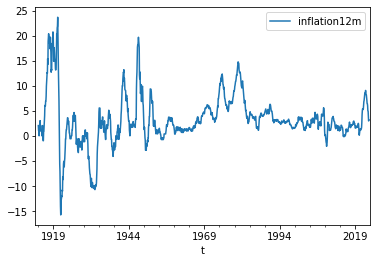

In [12]:
display(df.plot(x='t', y='inflation12m'))

The plot show significant inflation in World War I (1917-1919), significant delflation after World War I, significant deflation during the Great Depression (1931-1933), elevated inflation during World War II (1941-1945), elevated inflation during the 1970s, then mostly stable or falling inflation from about 1982 to 2021, except for brief deflation during the Global Financial Crisis of 2008-2009. The spike in inflation in 2021-2022 is unprecedented since the 1980s.

To focus on the more recent period, we can plot the annual inflation rate over a recent subperiod:

<AxesSubplot:xlabel='t'>

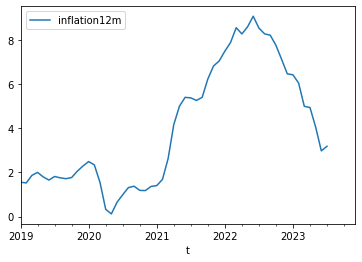

In [13]:
t0 = pd.to_datetime('2019-01-01')
t1 = pd.to_datetime('2023-12-31')
df[(t0 <= df['t']) & (df['t'] <= t1)].plot(x='t', y='inflation12m')

The plot shows that the recent bout of inflation started in early 2021 (one year before the Russian invasion of Ukraine), peaked in mid-2022, and is currently falling. It remains above the Fed's official target level of 2 percent, but it will reach 2 percent in several months if it continues falling at current rates.

#### Matplotlib

Here is the same plot, created using matplotlib.

For simplicity, we use single axis matplotlib. However, you can also create subplots by using multiple figures and axes with matplotlib's object-oriented interface. See https://matplotlib.org/stable/tutorials/introductory/lifecycle.html and https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html

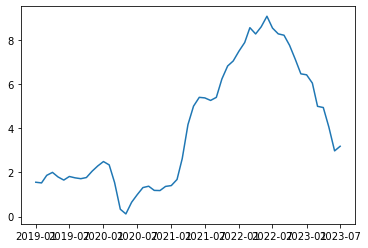

In [14]:
x = df.loc[(t0 <= df['t']) & (df['t'] <= t1)].t
y = df.loc[(t0 <= df['t']) & (df['t'] <= t1)].inflation12m

plt.plot(x,y)

We can clean up the plot by adding labels and limiting the amount of dates displayed on the x axis

Text(0.5, 1.0, 'Inflation Rate vs. Time')

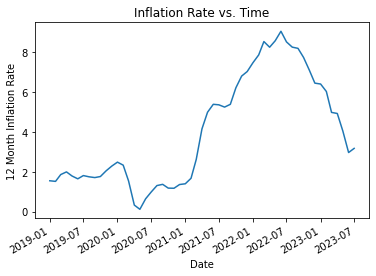

In [15]:
plt.plot(x,y) # add inflation legend
plt.xlabel("Date")
plt.ylabel("12 Month Inflation Rate")
plt.gcf().autofmt_xdate() # cleans up dates on x axis
plt.title("Inflation Rate vs. Time")

We can also plot the CPI and 12 month inflation rate together, and use a legend to differentiate the two. Note that in this case, the units of the y axis do not align, but we can still use this to visualize trends and it is often useful for displaying related data 

Text(0.5, 1.0, 'Inflation Rate & CPI vs. Time')

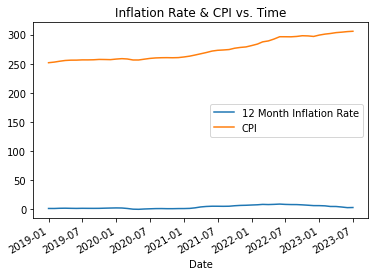

In [16]:
cpi = df.loc[(t0 <= df['t']) & (df['t'] <= t1)].cpi
plt.plot(x,y, label = "12 Month Inflation Rate") # add inflation legend
plt.plot(x, cpi, label = "CPI")
plt.xlabel("Date")
plt.gcf().autofmt_xdate() # cleans up dates on x axis
plt.legend()
plt.title("Inflation Rate & CPI vs. Time")

*Pretty much everything you want to do with a graph can be done with matplotlib if you do a bit of searching online*


### Part 2: Home Price Data

We can use *pd.read_csv* to read housing price data directly from Zillow's website:

In [17]:

# df = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_sm_month.csv?t=1691967616")
dfh = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1691967616")

print(f"{dfh.columns=}")
print(f"{dfh.index=}")

display(dfh.head(10))
display(dfh.tail(5))


dfh.columns=Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
       '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31'],
      dtype='object', length=288)
dfh.index=RangeIndex(start=0, stop=895, step=1)


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,102001,0,United States,country,NaN,115215.060987,115417.693632,115668.835076,116207.361953,116827.017306,...,342893.791055,342019.278670,340897.172975,340243.409003,340186.438102,341377.341047,342529.876118,344118.510057,346019.054142,348126.180542
1,394913,1,"New York, NY",msa,NY,188937.406428,189741.459747,190551.713646,192192.721840,193888.790935,...,599230.535882,597398.651335,594922.993370,594887.333828,596112.580353,600050.039046,603155.817763,607323.863650,612506.387816,618653.073765
2,753899,2,"Los Angeles, CA",msa,CA,223645.274156,224472.515292,225577.803520,227796.103768,230229.751861,...,901388.388599,897672.540460,893323.330406,884961.557044,874796.651896,867473.497311,865273.506397,868900.838953,876737.860960,889296.983779
3,394463,3,"Chicago, IL",msa,IL,144553.677041,144690.734658,144948.658674,145591.296092,146362.956233,...,295984.602121,295278.942974,294593.348603,295177.666600,296265.508630,298199.210375,299544.045369,301304.103648,303807.012258,306516.933358
4,394514,4,"Dallas, TX",msa,TX,129710.334780,129775.242966,129848.594994,130032.097809,130266.530240,...,380982.324430,379062.994766,376514.698150,373917.253527,371811.542961,371082.877106,370740.713883,371147.729712,372189.451235,373555.542026
5,394692,5,"Houston, TX",msa,TX,117858.436371,117877.227624,117792.538671,117837.439149,117880.213666,...,306655.396659,305987.510919,304620.156151,303030.090257,301838.210845,301812.623565,302016.741850,302472.900748,303190.474913,304175.451550
6,395209,6,"Washington, DC",msa,VA,175447.395550,175590.060483,175852.539489,176446.594888,177349.642826,...,531881.860521,530303.839577,528970.941802,528050.506014,527590.394946,529128.542764,531315.242603,534631.336420,538259.618250,541809.799470
7,394974,7,"Philadelphia, PA",msa,PA,116230.385493,116489.643379,116666.467013,117102.357904,117523.499406,...,330870.754535,331179.621889,331467.697569,332319.380218,333506.979806,335729.430187,337813.894528,340564.595160,343429.658457,346472.626716
8,394856,8,"Miami, FL",msa,FL,104813.187706,105102.178728,105406.890218,106021.478214,106614.097773,...,441589.885938,442655.684636,442947.906189,442948.119443,443073.069290,444654.479751,446835.778499,449712.218937,453877.538403,458333.188284
9,394347,9,"Atlanta, GA",msa,GA,142231.730111,142558.751106,142944.837005,143765.098201,144681.346740,...,375385.640180,374035.625676,372185.146117,370554.305504,369312.384124,369259.617955,369338.357932,370341.204859,371992.830184,374162.843553


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,112780.440130,110475.643320,108936.088290,111147.260409,114540.815895,118566.510496,119695.253228,120369.618804,121049.156604,122015.188041
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,411247.956356,410860.989330,409368.784197,407525.909158,406739.855554,407703.731151,409273.304196,410331.925952,409227.105953,406926.773515
892,753874,937,"Craig, CO",msa,CO,95532.892609,95775.41275,96229.230598,96875.566506,97626.611751,...,256169.152698,257737.808860,259093.460534,260214.720161,262406.699933,265753.144735,269859.303041,273595.854924,277330.894507,280163.677679
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,93666.386915,92873.235683,91377.174217,93094.920054,95531.333194,98689.509699,99340.685749,99563.064620,98473.781196,96589.790837
894,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,92598.616016,92077.552111,91674.657459,95162.890996,98498.306870,100671.963608,98505.043049,96410.787629,93631.023426,90867.101813


The dataset appears to contain monthly estimates from 2000 to presen of typical home values for almost 900 "metropolitan statistical areas" (MSAs) in the United State.

## Keys

It is typical to ask which columns or combinations of columns are **keys** which uniquely identify a row.

We can easily answer this question by comparing the lenth of the dataset with the number of unique values in each column:

In [18]:

print(f"{type(dfh.columns)=}, {type(dfh.index)=}")

print(f"{len(dfh)=}")

for vn in dfh.columns[0:5]:
    print(f"{vn}: {dfh[vn].nunique()=}")

# display(dfh?)

# dfh.T.describe()

type(dfh.columns)=<class 'pandas.core.indexes.base.Index'>, type(dfh.index)=<class 'pandas.core.indexes.range.RangeIndex'>
len(dfh)=895
RegionID: dfh[vn].nunique()=895
SizeRank: dfh[vn].nunique()=892
RegionName: dfh[vn].nunique()=895
RegionType: dfh[vn].nunique()=2
StateName: dfh[vn].nunique()=50


We see that 'RegionID' and 'RegionName' are keys, but 'SizeRank' is not a key. Evidently, there are a handful of ties for 'SizeRank' or missing values.

### Answering Questions about the data

1) Is the size of a city related to the average price of its homes?

2) Does the rent yield correlate with the price of the homes? (yield in %, not nominal)

3) How have housing prices and the inflation rate changed over time? Do the two series seem to be related?

As you can imagine, answering these questions will involve using CPI data, home housing data, and rent yield data. In the following portions of the notebook, we will transform and merge these datasets to answer all of these questions.


#### Transform data

It is common to transform data for the purpose of analysis. Let's add columns for the log of the house price, the log of ratio of the last price to the first, and the log of the SizeRank. I added 1 to the 'SizeRank' so that the log of the rank of 'SizeRank' for the entire United States would be defined.

In [19]:
dfh['log_price_2023'] = np.log(dfh['2023-07-31'])
dfh['log_price_ratio'] = np.log(dfh['2023-07-31'] / dfh['2000-01-31'])
dfh['log_rank'] = np.log(dfh['SizeRank'] + 1.00)

Suppose we are interested in whether larger cities have more expensive homes. Here is a pandas plot of the log of price against the log of size rank, with larger dots for the larger cities. I played around with the parameters for dot size given by `s=3000.00 / (df['log_rank'] + 1.00)**4`.

<AxesSubplot:xlabel='log_rank', ylabel='log_price_2023'>

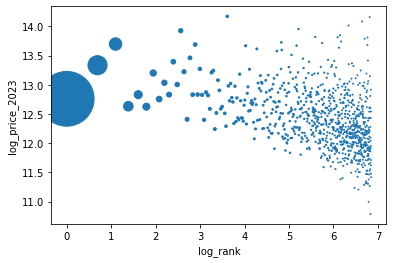

In [20]:
dfh.plot(kind='scatter', x="log_rank", y='log_price_2023', s=3000.00 / (dfh['log_rank'] + 1.00)**4)

The plot seems to show some tendency for large cities to have more expensive housing than small towns, but there are plenty of expensive small metropolitan areas.

Suppose we are interested only in Maryland and Virginia and are only interested in the first and last dates.  It is easy to construct a smaller dataframe:

In [21]:
vns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2000-01-31', '2023-07-31', 'log_price_ratio', 'log_rank', 'log_price_2023']
bstates = dfh['StateName'].isin(['MD', 'VA']) # check if the state name is part of a list
dfhs = dfh.loc[bstates, vns]
dfhs = dfhs.sort_values('log_price_ratio', ascending=False)
display(dfhs)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2023-07-31,log_price_ratio,log_rank,log_price_2023
772,394433,799,"Cambridge, MD",msa,MD,69734.764127,250066.823248,1.277029,6.684612,12.429483
205,394459,212,"Charlottesville, VA",msa,VA,121908.337416,417145.499502,1.230166,5.361292,12.941190
257,394392,265,"Blacksburg, VA",msa,VA,81598.402938,261732.639808,1.165514,5.583496,12.475079
299,395232,308,"Winchester, VA",msa,VA,112157.612467,346821.349807,1.128905,5.733341,12.756565
6,395209,6,"Washington, DC",msa,VA,175447.395550,541809.799470,1.127576,1.945910,13.202670
44,395022,45,"Richmond, VA",msa,VA,119596.769072,353409.316315,1.083501,3.828641,12.775382
37,395194,38,"Virginia Beach, VA",msa,VA,116823.288360,336139.558668,1.056864,3.663562,12.725282
20,394358,20,"Baltimore, MD",msa,MD,134640.130883,372577.283537,1.017839,3.044522,12.828200
710,394554,729,"Easton, MD",msa,MD,181860.672505,456907.564017,0.921240,6.593045,13.032236
187,394811,191,"Lynchburg, VA",msa,VA,104212.263455,260130.368471,0.914753,5.257495,12.468938


This dataframe reveals that the most expensive locations are somewhat small. Two are university towns with large, prestigious Virginia universities, Charlottesville and Blacksburg,

### Zillow Rent Data

Now let's consider Zillow rent data from the Zillow website:

In [22]:
dfr = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_sm_month.csv?t=1691967616")

print(dfr.columns)
display(dfr.head(5))


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       ...
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
       '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31'],
      dtype='object', length=108)


,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,102001,0,United States,country,NaN,1298.570541,1305.603710,1314.849323,1324.971116,1335.031550,...,2010.652650,2006.512875,2003.560232,2003.830544,2008.731594,2016.879772,2027.744934,2040.414636,2051.922544,2062.325742
1,394913,1,"New York, NY",msa,NY,2484.652612,2501.353146,2520.039136,2543.482724,2559.656833,...,3325.539583,3290.295412,3265.250277,3257.226701,3272.417128,3299.020133,3337.491495,3379.091414,3418.755754,3444.894715
2,753899,2,"Los Angeles, CA",msa,CA,1902.296358,1914.210437,1929.868954,1944.101727,1959.070431,...,2951.797385,2943.255356,2937.359187,2932.460137,2937.734955,2946.344845,2961.686279,2969.138097,2980.587102,2993.537275
3,394463,3,"Chicago, IL",msa,IL,1466.182620,1474.155317,1485.520610,1496.029448,1507.269882,...,1926.925893,1923.102591,1924.964220,1930.157792,1942.703930,1955.901563,1972.159959,1996.107711,2017.917114,2031.986874
4,394514,4,"Dallas, TX",msa,TX,1160.449333,1165.446697,1173.567406,1184.412910,1195.100065,...,1847.993852,1838.392788,1828.892512,1824.942021,1826.750588,1832.387445,1836.363950,1843.589874,1853.345623,1863.289312


These data have the same format as the home price data, with what appear to be monthly rent instead of home price.

We would like to merge the two datasets by date so that we have one dataframe with home price and rent on the same row.

The pandas function *pd.merge(...)* is exactly what we want. Since the home price and rent columns have the same names, we specify obvious suffixes "_h" and "_r" for home prices and rents.

In [23]:
vnsi = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
vnsx = ['2023-07-31']
vns = vnsi + vnsx

dfhr = pd.merge(left=dfh[vns], right=dfr[vns], how='inner', on=vnsi, suffixes=['_h', '_r'])

display(dfhr)


,RegionID,SizeRank,RegionName,RegionType,StateName,2023-07-31_h,2023-07-31_r
0,102001,0,United States,country,NaN,348126.180542,2062.325742
1,394913,1,"New York, NY",msa,NY,618653.073765,3444.894715
2,753899,2,"Los Angeles, CA",msa,CA,889296.983779,2993.537275
3,394463,3,"Chicago, IL",msa,IL,306516.933358,2031.986874
4,394514,4,"Dallas, TX",msa,TX,373555.542026,1863.289312
...,...,...,...,...,...,...,...
585,394687,875,"Hood River, OR",msa,OR,670895.027664,2291.666667
586,394718,892,"Jamestown, ND",msa,ND,194080.382041,981.100000
587,394996,915,"Portales, NM",msa,NM,145047.825034,1065.338828
588,394805,916,"Los Alamos, NM",msa,NM,512687.758776,2600.000000


#### Rent Yield

The rent yield is the annual rent as a fraction of the property value.  Since the rents in the data are monthly, we multiply the ratio of rent to value by 12, then again by 100 to express the rent yield so that 6 percent is 6, not 0.06: 

In [24]:
dfhr = dfhr.rename(columns={'2023-07-31_h' : 'price2023', '2023-07-31_r' : 'rent2023'})
dfhr['rentyield2023'] = dfhr['rent2023'] * 1200.00 / dfhr['price2023'] 
display(dfhr)

,RegionID,SizeRank,RegionName,RegionType,StateName,price2023,rent2023,rentyield2023
0,102001,0,United States,country,NaN,348126.180542,2062.325742,7.108890
1,394913,1,"New York, NY",msa,NY,618653.073765,3444.894715,6.682055
2,753899,2,"Los Angeles, CA",msa,CA,889296.983779,2993.537275,4.039421
3,394463,3,"Chicago, IL",msa,IL,306516.933358,2031.986874,7.955137
4,394514,4,"Dallas, TX",msa,TX,373555.542026,1863.289312,5.985582
...,...,...,...,...,...,...,...,...
585,394687,875,"Hood River, OR",msa,OR,670895.027664,2291.666667,4.099002
586,394718,892,"Jamestown, ND",msa,ND,194080.382041,981.100000,6.066146
587,394996,915,"Portales, NM",msa,NM,145047.825034,1065.338828,8.813690
588,394805,916,"Los Alamos, NM",msa,NM,512687.758776,2600.000000,6.085575


As a rule of thumb, I like to think of 6 percent as a typical rent yield. Let's plot 'rent_yield' as a function of 'SizeRank'

<AxesSubplot:xlabel='SizeRank', ylabel='rentyield2023'>

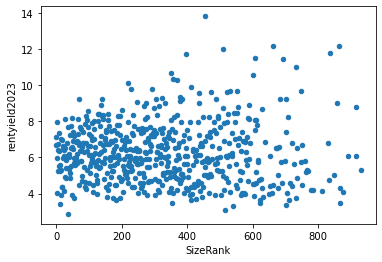

In [25]:
dfhr.plot(kind='scatter', x='SizeRank', y='rentyield2023')

The plot suggests that 6 percent is indeed a typical rent yield.  Of course, there are numerous caveats here. There is no guarantee that the typical home price matches the typical home rented out.

### Do more expensive communities have higher or lower rent yields?

Here is a plot of house price against rent yield:


<AxesSubplot:xlabel='price2023', ylabel='rentyield2023'>

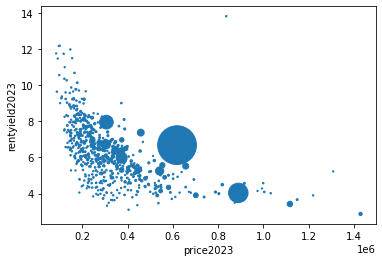

In [26]:
dfhr.plot(kind='scatter', x='price2023', y='rentyield2023', s=500.00 / (np.log(dfhr['SizeRank'] + 1.00)**3))

The plot suggests that the most expensive locations, with home prices above $500,000, tend to have rent yields less than small locations and less than 6 percent.  


### Examining house price appreciation relative to the CPI

We would like to compare the time series pattern of house price inflation relative to the CPI.

To do this, we need to first convert the dates in the house price data from rows into columns.

As a first step, we delete the variables which are not dates, so that all remaining variables correspond to dates:

In [27]:
dfh.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
       '2023-06-30', '2023-07-31', 'log_price_2023', 'log_price_ratio',
       'log_rank'],
      dtype='object', length=291)

In [28]:
vns_drop = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','log_price_2023', 'log_price_ratio', 'log_rank']
dfus = dfh.loc[0].drop(vns_drop)
dfus

2000-01-31    115215.060987
2000-02-29    115417.693632
2000-03-31    115668.835076
2000-04-30    116207.361953
2000-05-31    116827.017306
                  ...      
2023-03-31    341377.341047
2023-04-30    342529.876118
2023-05-31    344118.510057
2023-06-30    346019.054142
2023-07-31    348126.180542
Name: 0, Length: 283, dtype: object

The next step is to take the transpose of the entire dataframe converting rows to columns. We flip the dataframe sideways using the transpose function `.T`, then convert the resulting series into a dataframe using `to_frame()`, then convert the dates from an index into a column using `reset_index(drop=False)`, where the `drop=False` option tells pandas to keep the dates as a column in the dataframe.

In [29]:
dfus = dfus.T.to_frame().reset_index(drop=False)

The new dataframe dfus has columns with names 'index' for the dates and integer 0 for the column of prices. We Would like more intuitive names. To do so, we use the `rename(...)` function, which can take a dictionary of old names and new names as an argument:

In [30]:
dfus.columns

Index(['index', 0], dtype='object')

In [31]:
dfus = dfus.rename(columns={'index' : 't', 0 : 'price'})
dfus

,t,price
0,2000-01-31,115215.060987
1,2000-02-29,115417.693632
2,2000-03-31,115668.835076
3,2000-04-30,116207.361953
4,2000-05-31,116827.017306
...,...,...
278,2023-03-31,341377.341047
279,2023-04-30,342529.876118
280,2023-05-31,344118.510057
281,2023-06-30,346019.054142


The dtypes of the columns are 'object'. This typically means strings, but we want the date converted to datetime and want the prices as floating point numbers. We use *pd.to_datetime* to convert strings to dates and use `astype('float64')` to convert price to *np.float64*.

In [32]:
dfus.dtypes

t        object
price    object
dtype: object

In [33]:
dfus['t'] = pd.to_datetime(dfus['t'])
dfus['price'] = dfus['price'].astype('float64')

We want to merge the cpi data with the housing data by date, so that we can see how housing prices fluctuate relative to the CPI. 

Our CPI dates are beginning-of-month, but our housing dates are end of month, so the merge may not work. 

How do we change the date to the last day of the month? I googled "stackoverflow pandas change date to end of month" and got https://stackoverflow.com/questions/37354105/find-the-end-of-the-month-of-a-pandas-dataframe-series as the first hit. The accepted answer suggested using `pd.tseries.offsets.MonthEnd(0)`, which is exactly what I was looking for. This example illustrates that:

1. Pandas has many useful functions for doing exactly what you want.

2. These functions can often be found quickly by googling Stackoverflow (or searching the pandas documentation).

In [34]:
display(df.head(2))
df['t'] = df['t'] + pd.tseries.offsets.MonthEnd(0)
display(df.head(2))

,Year,month,cpi,t,inflation12m
0,1913,Jan,9.8,1913-01-01,NaN
111,1913,Feb,9.8,1913-02-01,NaN


,Year,month,cpi,t,inflation12m
0,1913,Jan,9.8,1913-01-31,NaN
111,1913,Feb,9.8,1913-02-28,NaN


With the dates lined up, we can merge the two datasets:

In [35]:
dfuscpi = pd.merge(left=dfus, right=df, how='outer', on=['t'])
display(dfuscpi)

,t,price,Year,month,cpi,inflation12m
0,2000-01-31,115215.060987,2000,Jan,168.8,2.738892
1,2000-02-29,115417.693632,2000,Feb,169.8,3.221884
2,2000-03-31,115668.835076,2000,Mar,171.2,3.757576
3,2000-04-30,116207.361953,2000,Apr,171.3,3.068592
4,2000-05-31,116827.017306,2000,May,171.5,3.188929
...,...,...,...,...,...,...
1327,2023-08-31,NaN,2023,Aug,NaN,NaN
1328,2023-09-30,NaN,2023,Sep,NaN,NaN
1329,2023-10-31,NaN,2023,Oct,NaN,NaN
1330,2023-11-30,NaN,2023,Nov,NaN,NaN


In [36]:
dfuscpi.isna().sum() # check how much data is missing

t                  0
price           1049
Year               0
month              0
cpi                5
inflation12m      17
dtype: int64

Since there is a lot of missing data, we create a smaller dataset which contains only dates since the year 2000.

Pandas tries to manage memory efficiently by not making unnecessary copies.  This can sometimes create confusion when what appear to be two different datasets actually contain the same data. To avoid ambiguity (often accompanied by pandas warnings), I recommend using the *copy()* function to avoid ambiguity about whether data is being shared.

In [37]:
dfuscpix = dfuscpi[dfuscpi['t'] >= np.datetime64('2000-01-01')].copy()

It is typically a good practice to use logs for data have positive values and where proportional relationships are important.

So we define some new columns, including columns with the mean subtracted so that series with different levels of values can be easily compared:

In [38]:
dfuscpix['logprice'] = np.log(dfuscpix['price'])
dfuscpix['logcpi'] = np.log(dfuscpix['cpi'])
dfuscpix['dlogprice'] = dfuscpix['logprice'] - dfuscpix['logprice'].mean()
dfuscpix['dlogcpi'] = dfuscpix['logcpi'] - dfuscpix['logcpi'].mean()

<AxesSubplot:xlabel='t'>

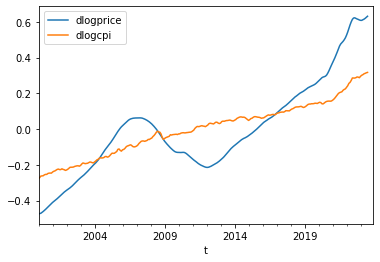

In [39]:

dfuscpix.plot(x='t', y=['dlogprice', 'dlogcpi'])

In the plot above, a change of $\pm 0.20$ implies multiplying or dividing housing prices or the CPI index by a factor of $\e^{0.20} \approx 1.22$ .

The plot shows that:

1. Housing prices fluctuate much more than the CPI.

2. Housing prices increased much faster than the CPI before the financial crisis of 2008.

3. Housing prices declined relative to the CPI from about 2007 to 2013.

4. Since about 2013, housing prices have increased relative to the CPI and are now higher compared to the CPI than before the financial crisis of 2008.

What does all of this mean?  

1.  Warren Buffett's company, Berkshire Hathaway, has recently made significant investments in homebuilder stocks. Perhaps Buffett thinks there is a shortage of housing which will trigger new construction which drives housing prices down in real terms over several years, generating good profits for homebuilders in the meantime.

2. If a recession hits, the recession may reduce inflation, as a reult of which the Fed may lower interest rates, which will make housing more affordable and stimulate investment in housing, bringing housing prices down relative to the CPI but helping bring the economy out of the recession.

Obviously, these two interpretations are very compatible with each other.

## Practice Questions

1) From economic definitons, we would expect to see that housing prices increases as CPI increases (due to inflation). Using the `dfuscpix` dataframe and matplotlib, plot the housing prices against CPI. Does this relationship hold? Add a label to the axes, and add a title. *Note: What plot makes the most sense here? A scatter plot or a line plot, or something else?*


2) Define the change in 1m inflation rate as `((cpi of period t)/(cpi of period t-1) - 1) * 100`. Which month has had the highest historical average monthly inflation rate, and which month has the lowest? You can use the original *df* to answer this question (hint: use pandas groupby)


### Challenge Question

Let's again examine the data between January 1, 2019 and December 31, 2023 (Or present day). How can we reconstruct the 12m inflation rate from the 1m inflation rate using the pandas Rolling and apply functions, in addition to the np.prod function? Create an additional column which displays the difference between your reconstructed 12m inflation rate and the true 12m inflation rate and show that the differences are 0 for every month. You can use the `value_counts()` function. Think about how the 12month inflation rate *(expressed as a percentage)* is related to the 1m inflation rate *(also expressed as a percentage)*

*Hint: this is meant to be more difficult, but you may be able to figure it out using some searching. As a note, the rolling function is used for calculating statistics over some period. For example, I can use `df.cpi.rolling(12).mean()` or `df.cpi.rolling(12).apply(np.mean)` to retrieve the rolling average cpi for the previous year, relative to every point in the dataset*